In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

from glob import glob


In [21]:
# Ruta a tus datos limpios
folder = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos_limpios"
csv_files = glob(os.path.join(folder, "*.csv"))

In [14]:
def estimar_spo2_latido_a_latido(filepath, plot=True):
    df = pd.read_csv(filepath, encoding='utf-8-sig')  # Soporta BOM
    df.columns = df.columns.str.strip()  # Quita espacios en los nombres de columna

    tiempo = df['Tiempo (ms)'].values
    ir = df['IR'].values - df['AMB_IR'].values
    red = df['RED'].values - df['AMB_RED'].values

    # Suavizado de la señal (preserva forma)
    ir_smooth = savgol_filter(ir, window_length=101, polyorder=3)
    red_smooth = savgol_filter(red, window_length=101, polyorder=3)

    # Detección de valles (mínimos) en IR -> inicio de cada latido
    peaks, _ = find_peaks(-ir_smooth, distance=50)

    spo2_list = []
    r_list = []
    tiempos_latido = []

    for i in range(len(peaks) - 1):
        start, end = peaks[i], peaks[i+1]
        ir_segment = ir_smooth[start:end]
        red_segment = red_smooth[start:end]

        if len(ir_segment) < 10:
            continue

        # AC = pico - valle | DC = media del segmento
        ac_ir = np.max(ir_segment) - np.min(ir_segment)
        dc_ir = np.mean(ir_segment)

        ac_red = np.max(red_segment) - np.min(red_segment)
        dc_red = np.mean(red_segment)

        if dc_ir == 0 or dc_red == 0:
            continue

        R = (ac_red / dc_red) / (ac_ir / dc_ir)
        spo2 = 104 - 17 * R

        if 70 <= spo2 <= 100:  # Valid range
            spo2_list.append(spo2)
            r_list.append(R)
            tiempos_latido.append(tiempo[start])

    if plot:
        fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

        axs[0].plot(tiempo, ir_smooth, label="IR suavizada", color='darkred')
        axs[0].scatter(tiempo[peaks], ir_smooth[peaks], color='black', label='Valles detectados', s=10)
        axs[0].set_title(f"Señal IR - {os.path.basename(filepath)}")
        axs[0].set_ylabel("Intensidad IR")
        axs[0].legend()

        axs[1].plot(tiempos_latido, spo2_list, marker='o', color='blue', label="SpO₂ por latido")
        axs[1].hlines(np.mean(spo2_list), xmin=tiempo[0], xmax=tiempo[-1], colors='green', linestyle='--', label=f"Media SpO₂: {np.mean(spo2_list):.1f}%")
        axs[1].set_ylabel("SpO₂ (%)")
        axs[1].set_xlabel("Tiempo (ms)")
        axs[1].legend()
        axs[1].grid(True)

        plt.tight_layout()
        plt.show()

    return np.mean(spo2_list), len(spo2_list)



Procesando: raw_data_91_91.csv


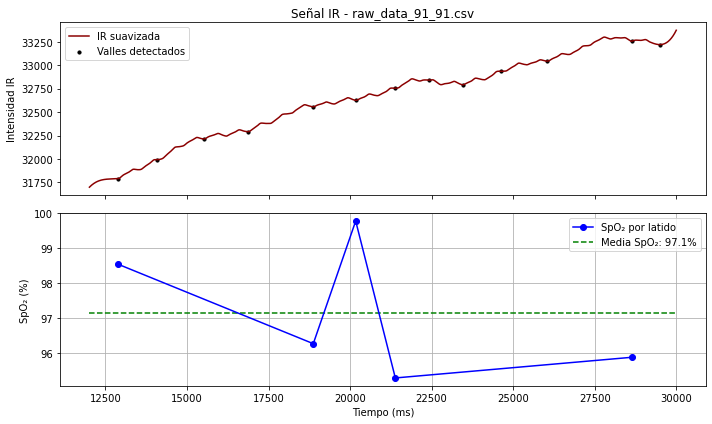


Procesando: raw_data_92_76.csv


C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


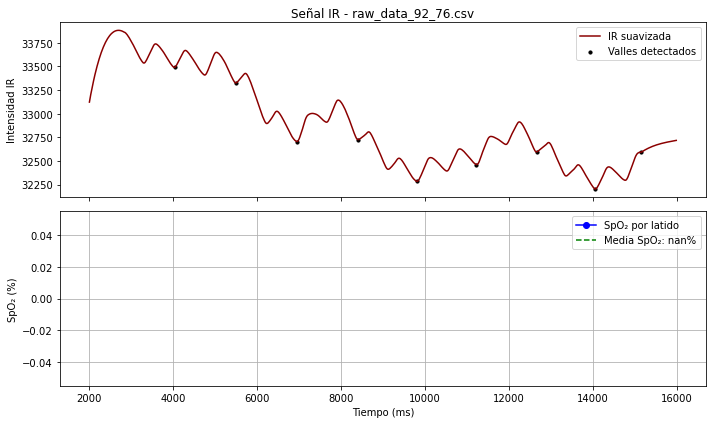


Procesando: raw_data_93_100.csv


C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


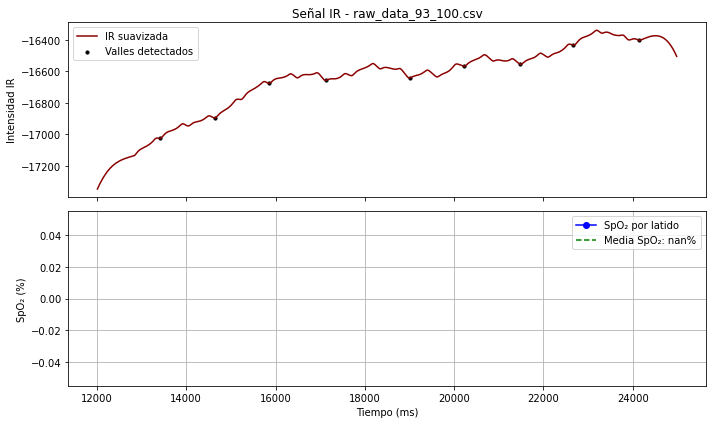


Procesando: raw_data_95_77_2.csv


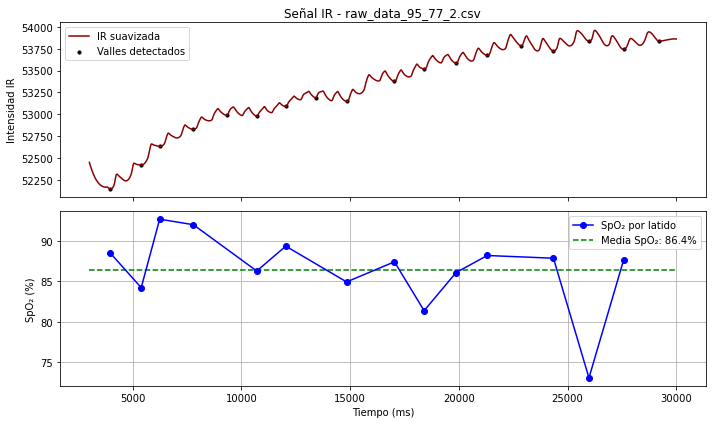


Procesando: raw_data_95_80.csv


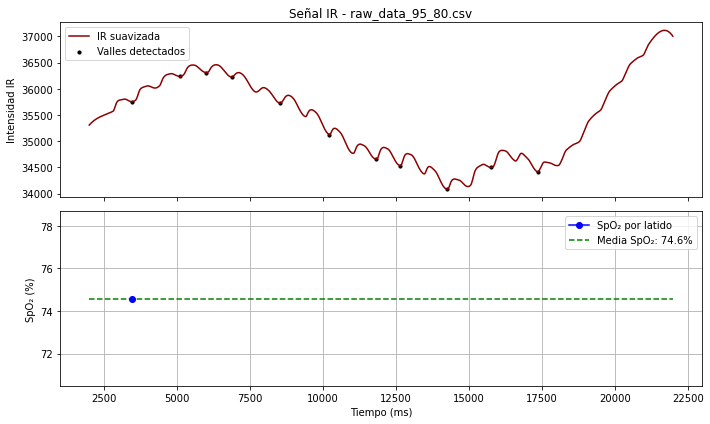


Procesando: raw_data_95_81_papa.csv


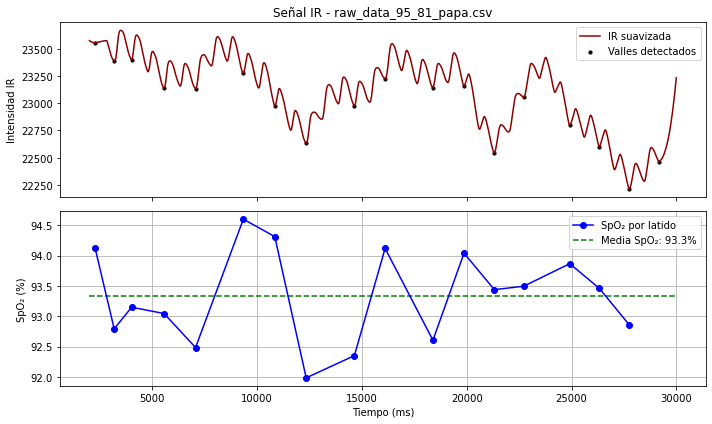


Procesando: raw_data_95_99.csv


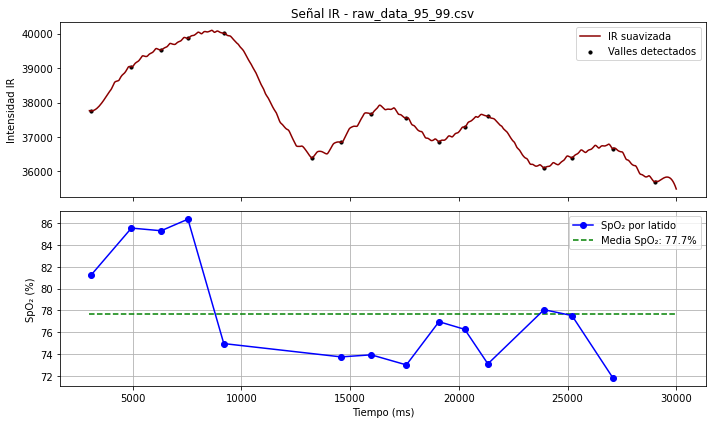


Procesando: raw_data_96_106.csv


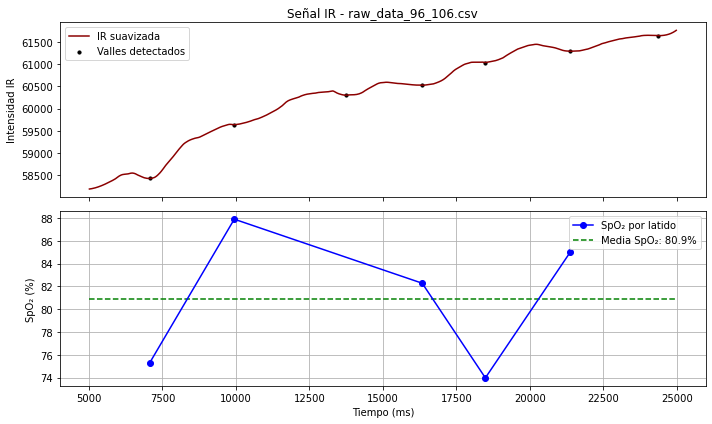


Procesando: raw_data_96_69.csv


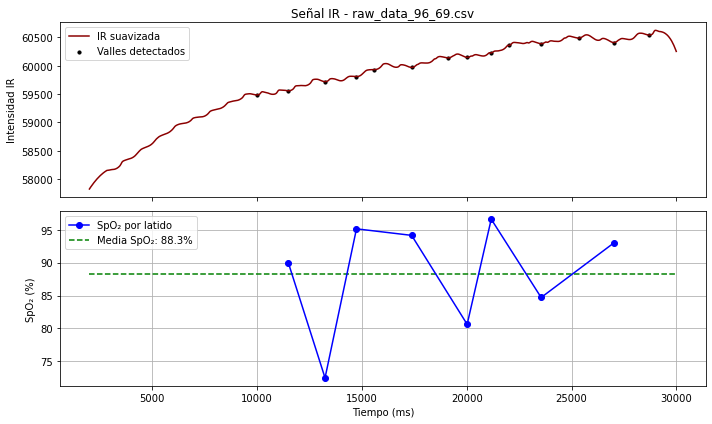


Procesando: raw_data_97_119.csv


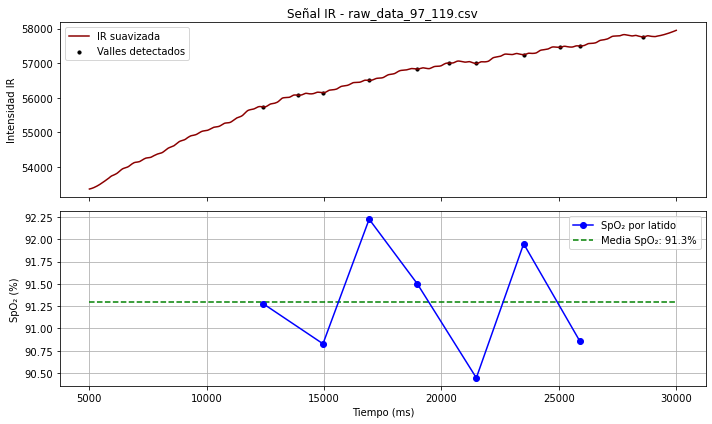


Procesando: raw_data_97_95.csv


C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


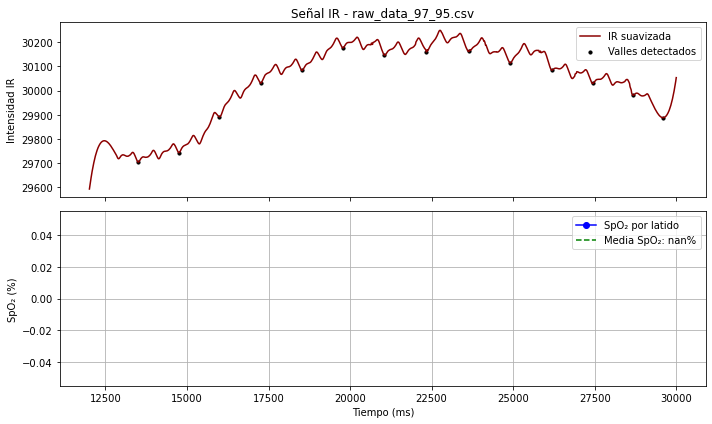


Procesando: raw_data_98_81.csv


C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


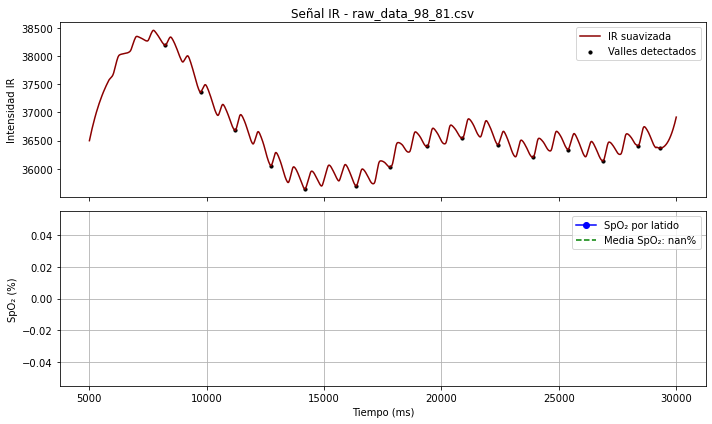


Procesando: raw_data_98_86.csv


C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


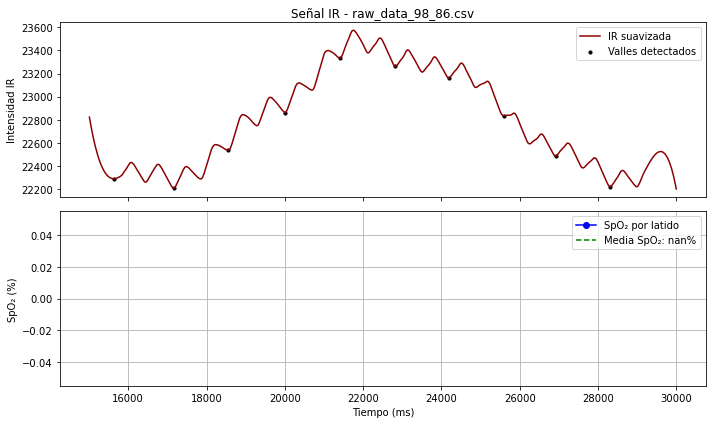


Procesando: raw_data_98_91.csv


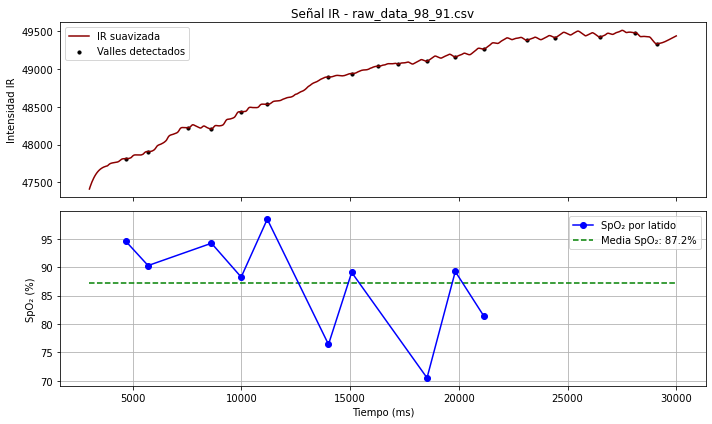


Procesando: raw_data_99_75.csv


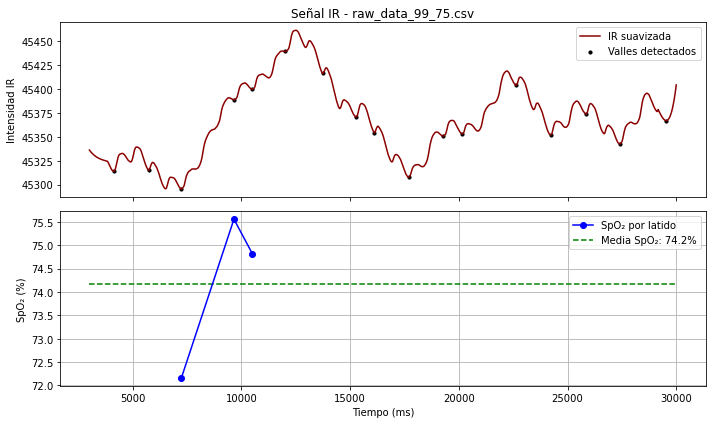


Procesando: raw_data_99_91.csv


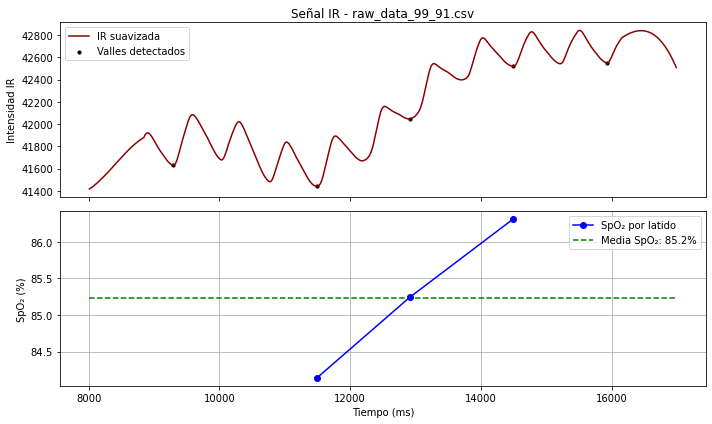

In [15]:
ruta = r'C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos_limpios'
csv_files = glob.glob(os.path.join(ruta, "*.csv"))

resultados = []

for file in csv_files:
    print(f"\nProcesando: {os.path.basename(file)}")
    try:
        spo2, n_latidos = estimar_spo2_latido_a_latido(file)
        resultados.append({
            "Archivo": os.path.basename(file),
            "SpO₂ estimada": round(spo2, 1),
            "Latidos analizados": n_latidos
        })
    except Exception as e:
        print(f"❌ Error procesando {file}: {e}")


In [16]:
def estimar_spo2_latido_a_latido(filepath, plot=True):
    df = pd.read_csv(filepath, encoding='utf-8-sig')
    df.columns = df.columns.str.strip()
    
    tiempo = df['Tiempo (ms)'].values
    ir = df['IR'].values - df['AMB_IR'].values
    red = df['RED'].values - df['AMB_RED'].values

    # Eliminar primeros y últimos 3 segundos
    frecuencia_muestreo = 1000 / np.mean(np.diff(tiempo))
    muestras_3s = int(frecuencia_muestreo * 3)

    if len(ir) < 2 * muestras_3s:
        print("❗ Muy pocos datos después del recorte, archivo ignorado.")
        return np.nan, 0
    
    tiempo = tiempo[muestras_3s:-muestras_3s]
    ir = ir[muestras_3s:-muestras_3s]
    red = red[muestras_3s:-muestras_3s]

    ventana = int(frecuencia_muestreo * 1)
    spo2_values = []

    for i in range(0, len(ir) - ventana, ventana):
        ventana_ir = ir[i:i+ventana]
        ventana_red = red[i:i+ventana]

        # Evitar ventanas con valores NaN o cero constante
        if np.any(np.isnan(ventana_ir)) or np.any(np.isnan(ventana_red)):
            continue
        if np.all(ventana_ir == 0) or np.all(ventana_red == 0):
            continue

        ac_ir = np.std(ventana_ir)
        dc_ir = np.mean(ventana_ir)
        ac_red = np.std(ventana_red)
        dc_red = np.mean(ventana_red)

        if dc_ir == 0 or dc_red == 0:
            continue

        R = (ac_red / dc_red) / (ac_ir / dc_ir)
        spo2 = 110 - 25 * R
        if 50 <= spo2 <= 100:  # descartamos valores extremos
            spo2_values.append(spo2)

    spo2_promedio = np.mean(spo2_values) if spo2_values else np.nan

    if plot:
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, ir, label='IR', alpha=0.7)
        plt.plot(tiempo, red, label='RED', alpha=0.7)
        plt.title(f'Señales IR y RED: {os.path.basename(filepath)}')
        plt.xlabel("Tiempo (ms)")
        plt.ylabel("Intensidad")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        if spo2_values:
            plt.figure(figsize=(6, 3))
            plt.plot(spo2_values, marker='o', color='purple')
            plt.title(f'SpO₂ latido a latido: {os.path.basename(filepath)}')
            plt.ylabel("SpO₂ (%)")
            plt.ylim(70, 100)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    return spo2_promedio, len(spo2_values)



Procesando: raw_data_91_91.csv


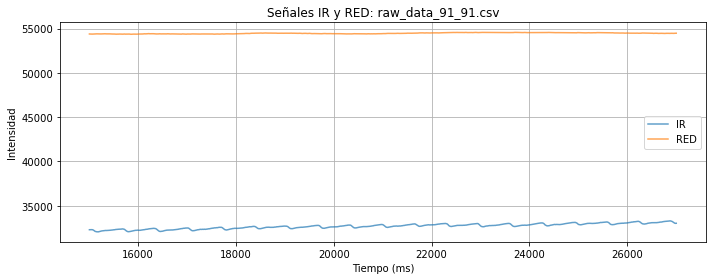


Procesando: raw_data_92_76.csv


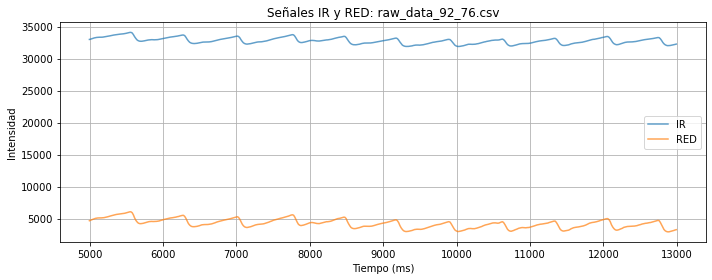


Procesando: raw_data_93_100.csv


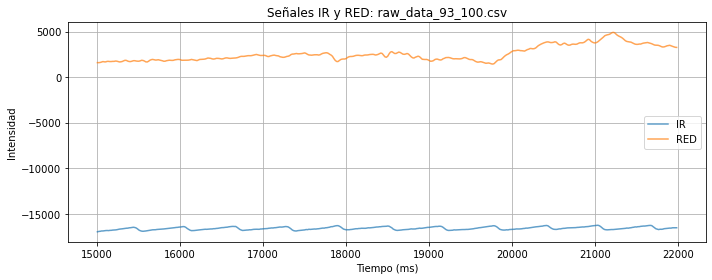


Procesando: raw_data_95_77_2.csv


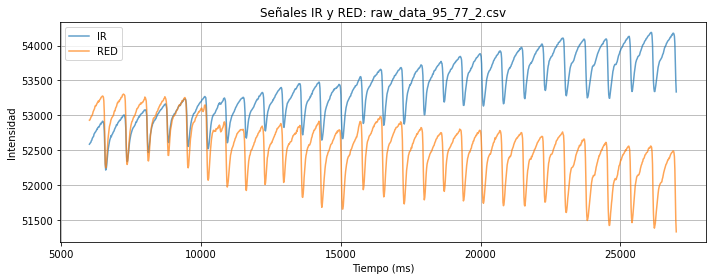

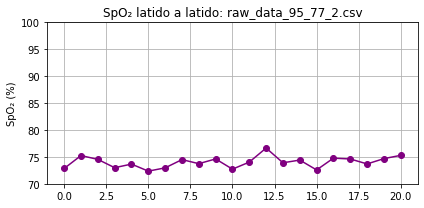


Procesando: raw_data_95_80.csv


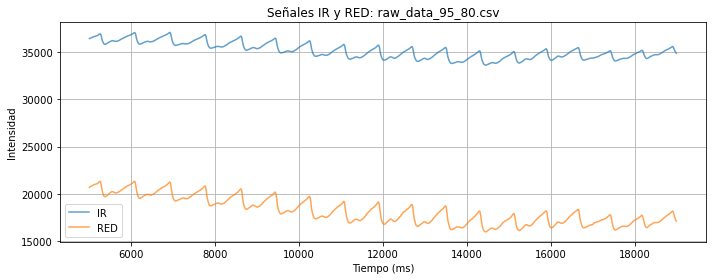


Procesando: raw_data_95_81_papa.csv


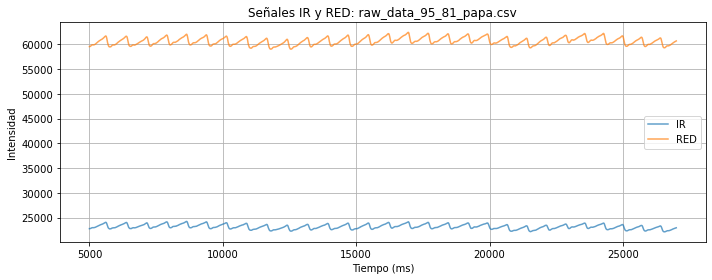

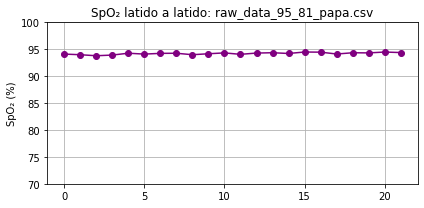


Procesando: raw_data_95_99.csv


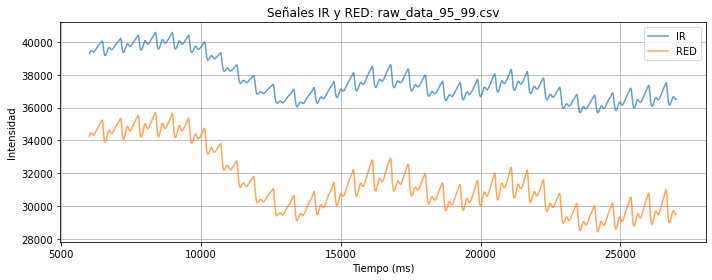

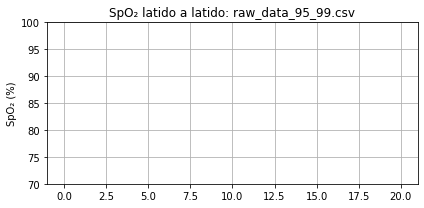


Procesando: raw_data_96_106.csv


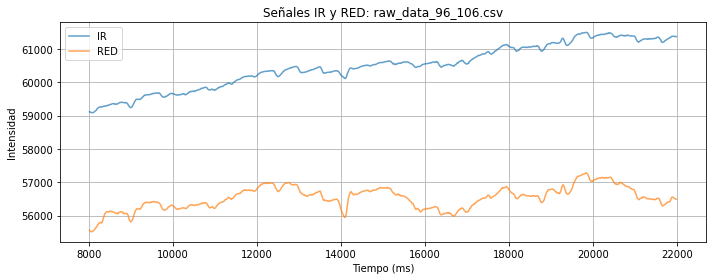

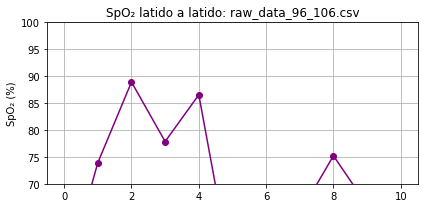


Procesando: raw_data_96_69.csv


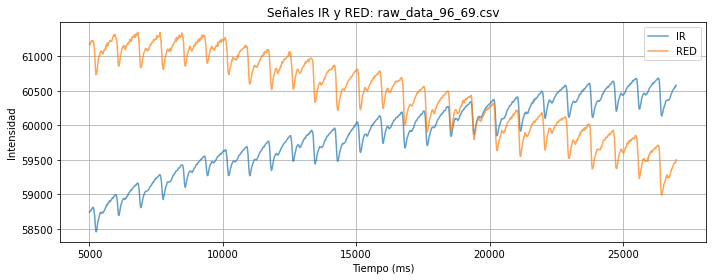

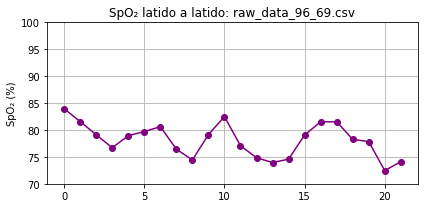


Procesando: raw_data_97_119.csv


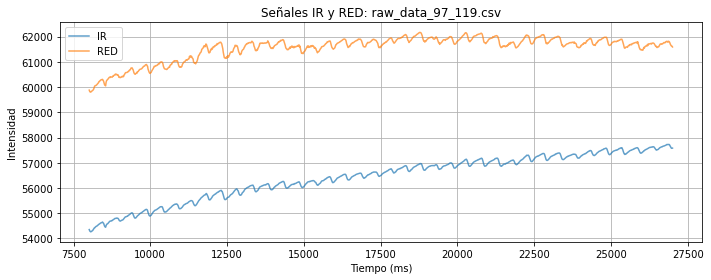

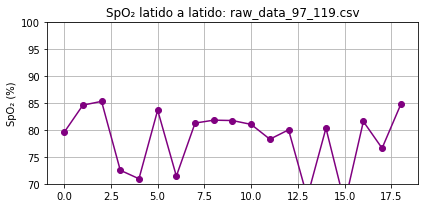


Procesando: raw_data_97_95.csv


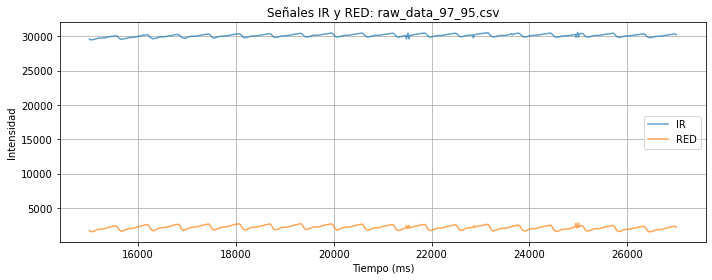


Procesando: raw_data_98_81.csv


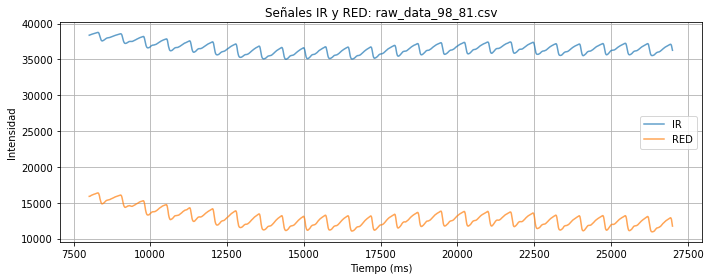


Procesando: raw_data_98_86.csv


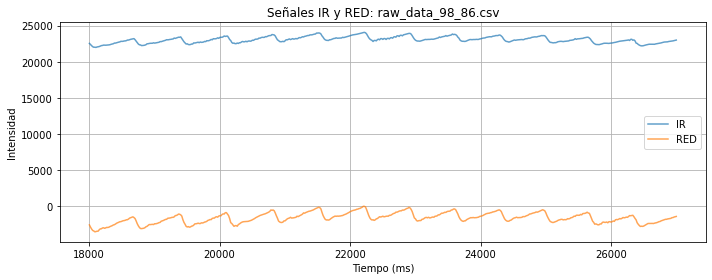


Procesando: raw_data_98_91.csv


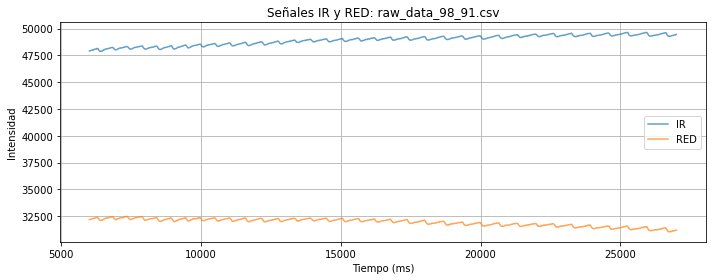

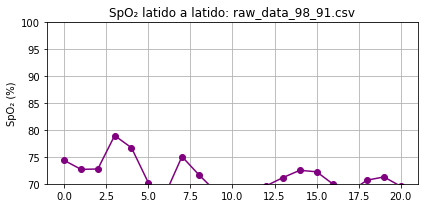


Procesando: raw_data_99_75.csv


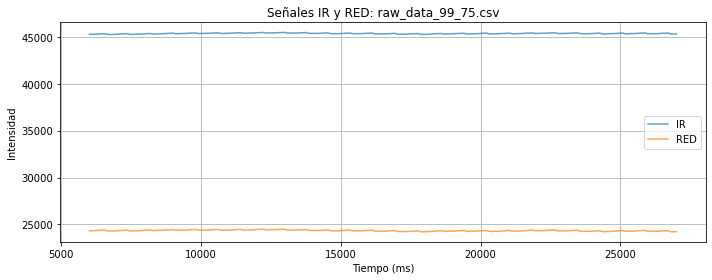

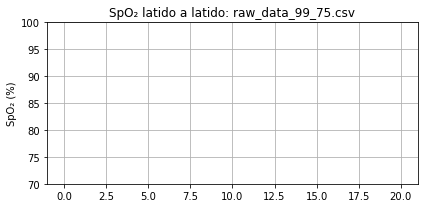


Procesando: raw_data_99_91.csv


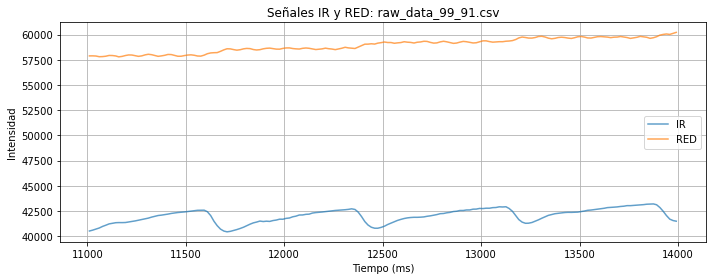

In [17]:
ruta = r'C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos_limpios'
csv_files = glob.glob(os.path.join(ruta, "*.csv"))

resultados = []

for file in csv_files:
    print(f"\nProcesando: {os.path.basename(file)}")
    try:
        spo2, n_latidos = estimar_spo2_latido_a_latido(file)
        resultados.append({
            "Archivo": os.path.basename(file),
            "SpO₂ estimada": round(spo2, 1),
            "Latidos analizados": n_latidos
        })
    except Exception as e:
        print(f" Error procesando {file}: {e}")


In [9]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import os

# Tabla de referencia SpO₂
spo2_table = np.array([
    95, 95, 95, 96, 96, 96, 97, 97, 97, 97, 97, 98, 98, 98, 98, 98, 99, 99, 99, 99,
    99, 99, 99, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
    100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 98, 97, 97,
    97, 97, 96, 96, 96, 96, 95, 95, 95, 94, 94, 94, 93, 93, 93, 92, 92, 92, 91, 91,
    90, 90, 89, 89, 89, 88, 88, 87, 87, 86, 86, 85, 85, 84, 84, 83, 82, 82, 81, 81,
    80, 80, 79, 78, 78, 77, 76, 76, 75, 74, 74, 73, 72, 72, 71, 70, 69, 69, 68, 67,
    66, 66, 65, 64, 63, 62, 62, 61, 60, 59, 58, 57, 56, 56, 55, 54, 53, 52, 51, 50,
    49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 31, 30, 29,
    28, 27, 26, 25, 23, 22, 21, 20, 19, 17, 16, 15, 14, 12, 11, 10, 9, 7, 6, 5,
    3, 2, 1
])

def moving_average(signal, window_size=4):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

def preprocess_signal(ir, red):
    ir_mean = moving_average(ir)
    red_mean = moving_average(red)
    return ir_mean, red_mean

def detect_peaks(signal, min_height=None, min_distance=30):
    peaks, _ = find_peaks(signal, height=min_height, distance=min_distance)
    return peaks

def compute_spo2(ir_ac, ir_dc, red_ac, red_dc):
    ratio = (red_ac / red_dc) / (ir_ac / ir_dc)
    idx = int(ratio * 100)
    idx = np.clip(idx, 0, len(spo2_table) - 1)
    return spo2_table[idx]

def estimate_spo2_and_hr(ir_raw, red_raw, fs=100):
    ir_filtered, red_filtered = preprocess_signal(ir_raw, red_raw)
    
    peaks = detect_peaks(ir_filtered, min_distance=int(0.5 * fs))
    if len(peaks) < 2:
        return None, None

    peak_intervals = np.diff(peaks)
    avg_interval = np.mean(peak_intervals)
    hr = 60 * fs / avg_interval

    spo2_values = []
    for i in range(len(peaks) - 1):
        seg_ir = ir_filtered[peaks[i]:peaks[i+1]]
        seg_red = red_filtered[peaks[i]:peaks[i+1]]
        if len(seg_ir) < 2 or len(seg_red) < 2:
            continue
        ir_ac = np.max(seg_ir) - np.min(seg_ir)
        red_ac = np.max(seg_red) - np.min(seg_red)
        ir_dc = np.mean(seg_ir)
        red_dc = np.mean(seg_red)
        if ir_dc == 0 or red_dc == 0:
            continue
        spo2 = compute_spo2(ir_ac, ir_dc, red_ac, red_dc)
        spo2_values.append(spo2)

    spo2_estimate = np.mean(spo2_values) if spo2_values else None
    return hr, spo2_estimate

def load_csv_and_estimate(path):
    df = pd.read_csv(path, sep=',')
    df.columns = df.columns.str.strip()  # Limpia espacios en los nombres de columna
    ir = df['IR'].to_numpy()
    red = df['RED'].to_numpy()
    return estimate_spo2_and_hr(ir, red)



In [10]:
csv_path = r'C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_95_77_2.csv'

hr, spo2 = load_csv_and_estimate(csv_path)

print(f"FC estimada: {hr:.1f} bpm" if hr else "No se pudo estimar FC")
print(f"SpO₂ estimada: {spo2:.1f} %" if spo2 else "No se pudo estimar SpO₂")


FC estimada: 75.5 bpm
SpO₂ estimada: 56.5 %
